In [197]:
import pandas as pd
import numpy as np
import seaborn as sns

In [198]:
df= pd.read_csv("fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [199]:
X=df.drop('price',axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [200]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [202]:
model=Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

In [203]:
model.compile(optimizer='adam',loss='mse')

In [204]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 988us/step - loss: 256363.5469
Epoch 2/250
22/22 [==============================] - 0s 999us/step - loss: 256224.2031
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256061.9375
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255872.2344
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255652.0625
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255391.8438
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255087.7656
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254730.0156
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254318.1094
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 253831.8594
Epoch 11/250
22/22 [==============================] - 0s 997us/step - loss: 253262.7031
Epoch 12/250
22/22 [==============================] - 0s 

<AxesSubplot:>

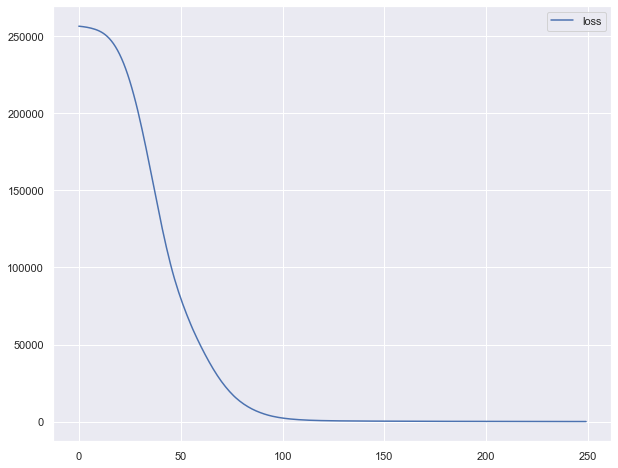

In [205]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [206]:
predictions=model.predict(X_test)
pred_df=pd.DataFrame(predictions)
y_test_df=pd.DataFrame(y_test)

In [207]:
newdf=pd.concat([y_test_df,pred_df],axis=1)
newdf.columns=(['y_test','prediction'])
newdf.head()

,y_test,prediction
0,316.636848,318.810852
1,330.082302,320.316498
2,223.346793,350.747955
3,484.461591,484.104919
4,511.298245,501.972565


<AxesSubplot:xlabel='y_test', ylabel='prediction'>

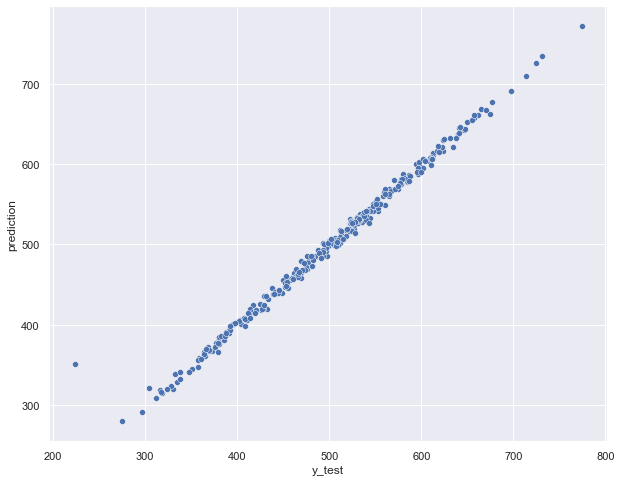

In [208]:

sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x='y_test',y='prediction',data=newdf)

In [210]:
model.evaluate(X_train,y_train,verbose=0)         #mse/loss in training data for evalaute

70.03083801269531

In [212]:
model.evaluate(X_test,y_test,verbose=0)          #mse/loss in test data for evaluate

81.09468841552734